# 타이타닉 튜토리얼 1 
-exploratory data analysis, visualization, machine learning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)
'''
matplotlib의 기본 scheme 말고 seaborn scheme을 세팅하고, 일일이 graph의 font size를
지정 할 필요 없이 seaborn의 font_scale을 사용하면 편합니다.
'''
import missingno as msno

import warnings #ignore warnings
warnings.filterwarnings('ignore')

%matplotlib inline

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Null data check

In [4]:
for col in df_train.columns:
    msg='column : {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)
print(df_train.isnull())

column : PassengerId	 Percent of NaN value: 0.00%
column :   Survived	 Percent of NaN value: 0.00%
column :     Pclass	 Percent of NaN value: 0.00%
column :       Name	 Percent of NaN value: 0.00%
column :        Sex	 Percent of NaN value: 0.00%
column :        Age	 Percent of NaN value: 19.87%
column :      SibSp	 Percent of NaN value: 0.00%
column :      Parch	 Percent of NaN value: 0.00%
column :     Ticket	 Percent of NaN value: 0.00%
column :       Fare	 Percent of NaN value: 0.00%
column :      Cabin	 Percent of NaN value: 77.10%
column :   Embarked	 Percent of NaN value: 0.22%
     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4   

In [5]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


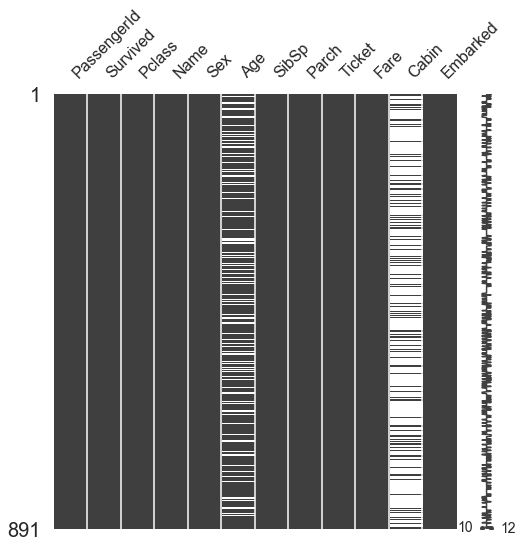

In [6]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8))

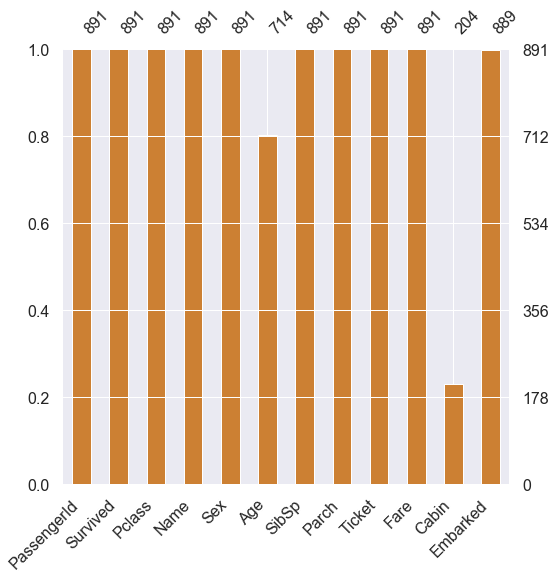

In [12]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

# 1.2 target label 확인

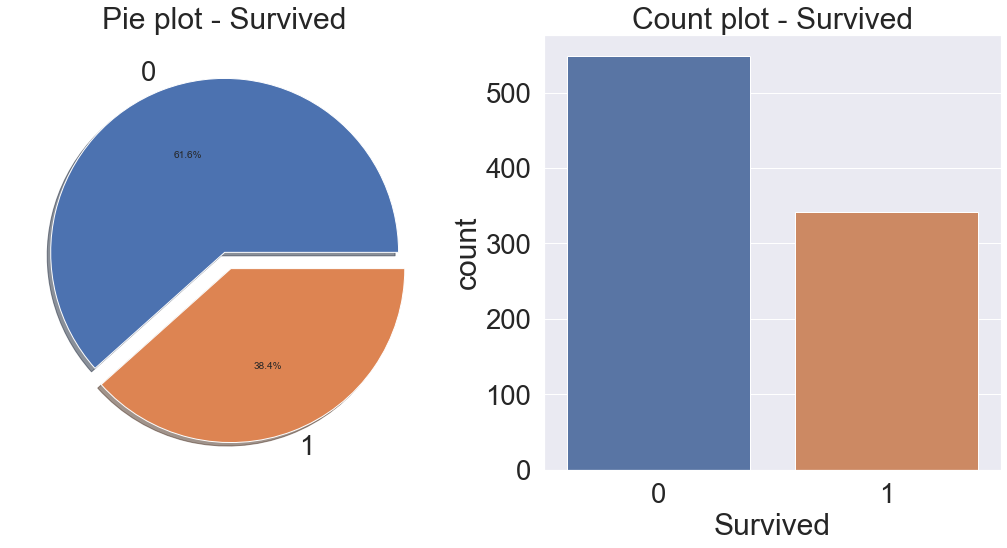

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

# 2. Exploratory data analysis

## 2.1 Pclass

In [25]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [26]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [40]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [46]:
df_train[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


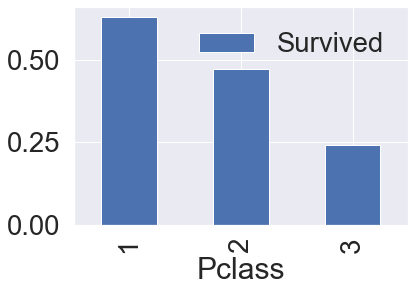

In [50]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False)

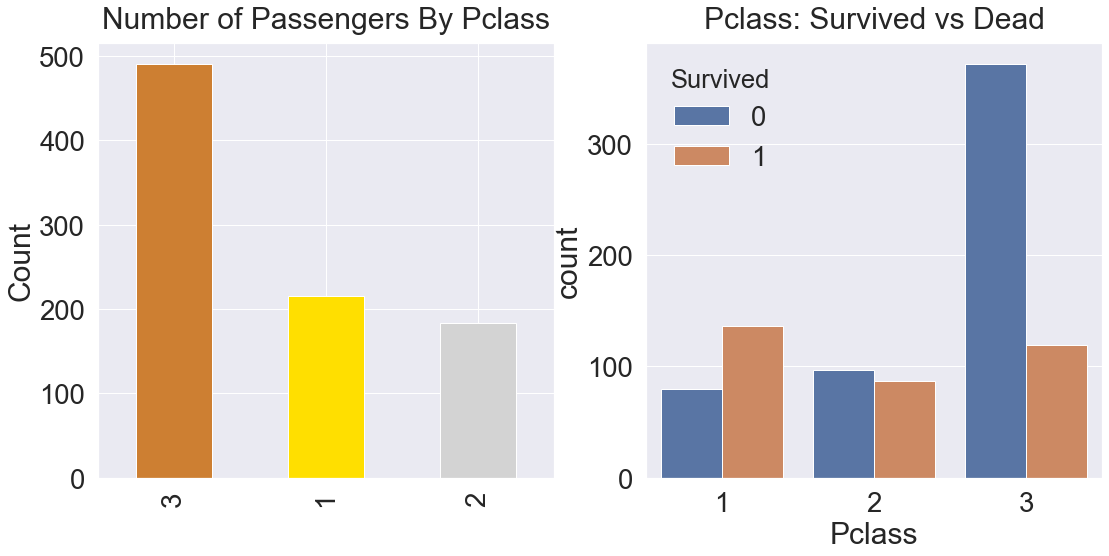

In [55]:
y_position=1.02 #title 위치
f, ax = plt.subplots(1,2,figsize=(18,8)) 
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1]) #hue?
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

생존에 Pclass가 큰 영향을 미친다고 생각해 볼 수 있으며, 나중에 모델을 세울 때 이 feature를 사용하는 것이 좋을 것이라 판단할 수 있다

## 2.2 sex

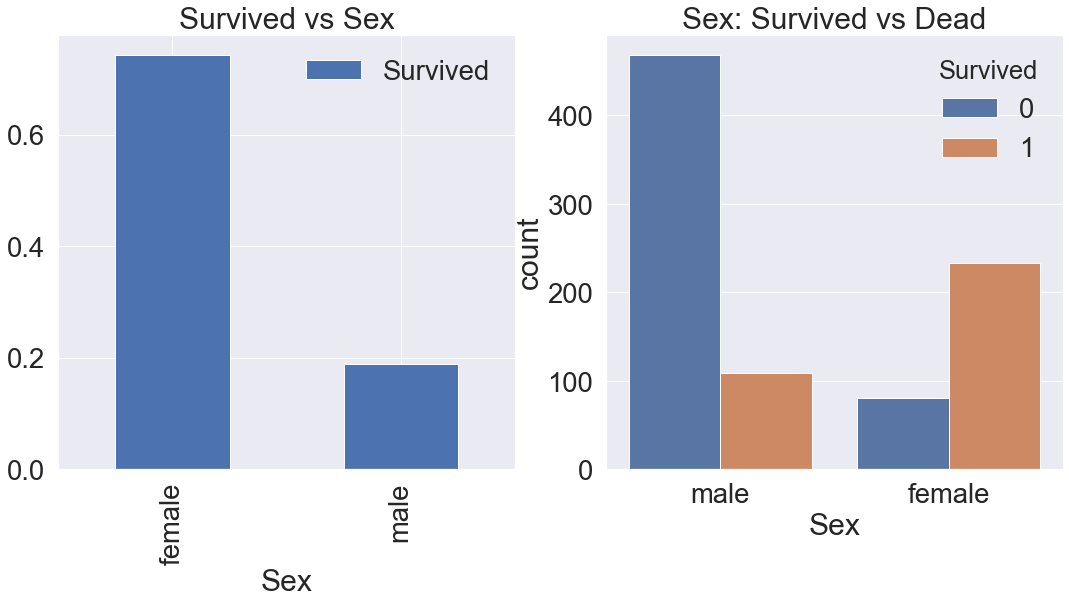

In [59]:
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [60]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [62]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2.3 Both Sex and Pclass

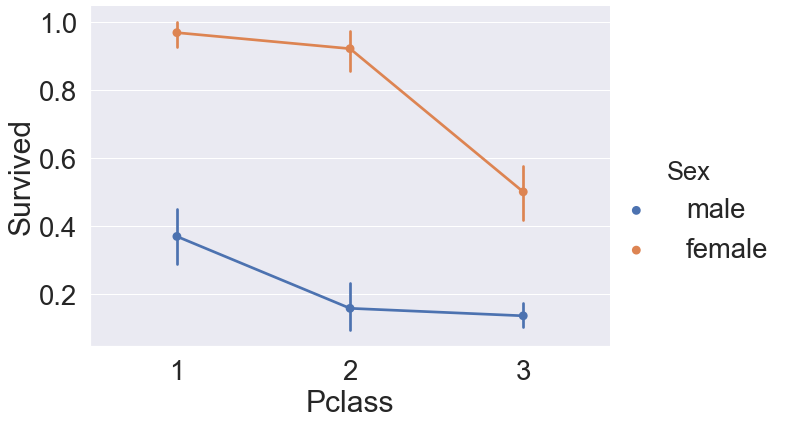

In [63]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

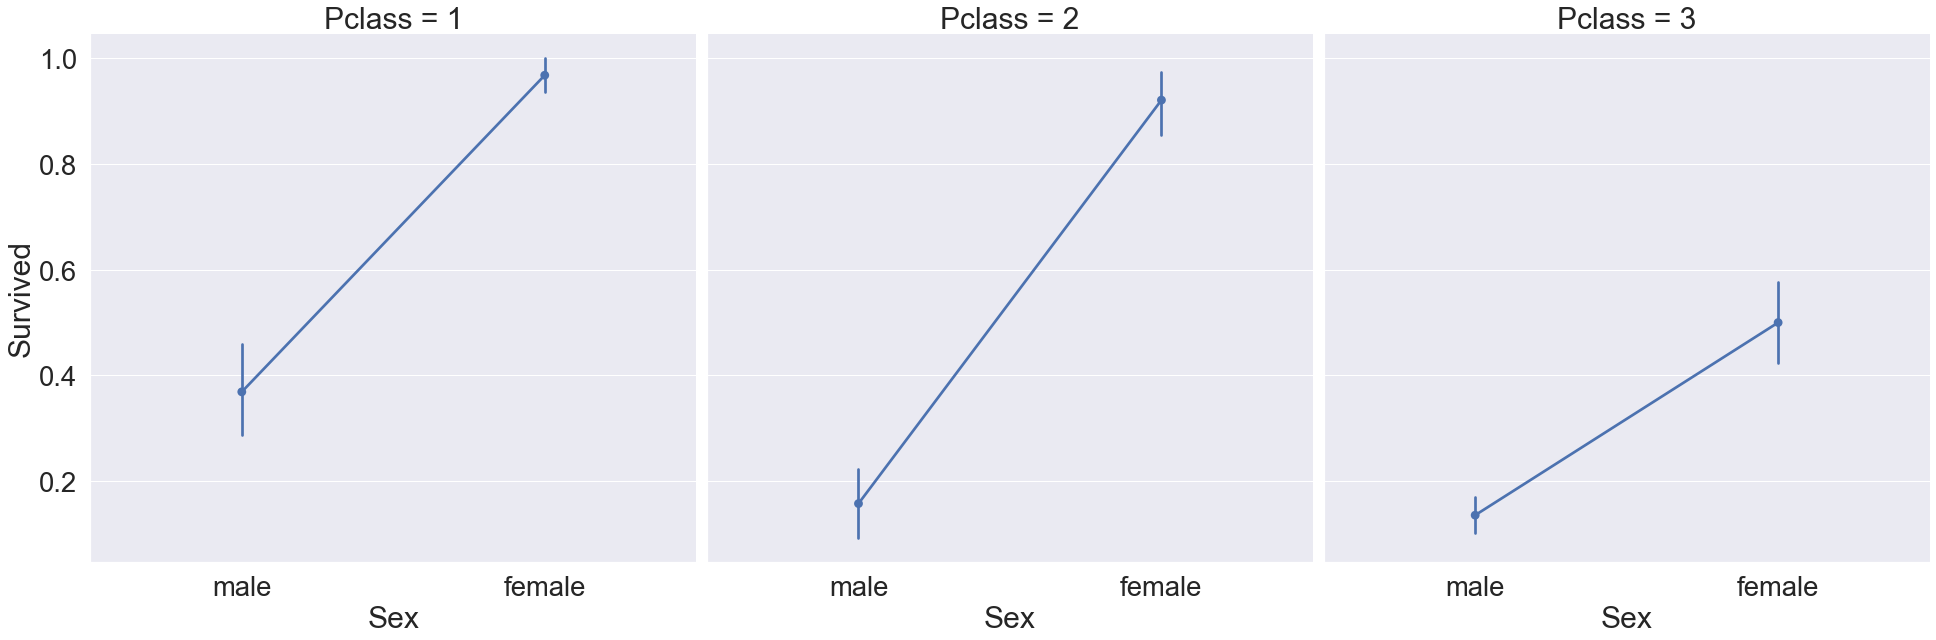

In [66]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, saturation=.5, size=9, aspect=1)

## 2.4 Age

In [76]:
print('제일 나이 많은 탑승객 : {:.1f}Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f}Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f}Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0Years
제일 어린 탑승객 : 0.4Years
탑승객 평균 나이 : 29.7Years


생존에 따른 age의 histogram

ValueError: array must not contain infs or NaNs

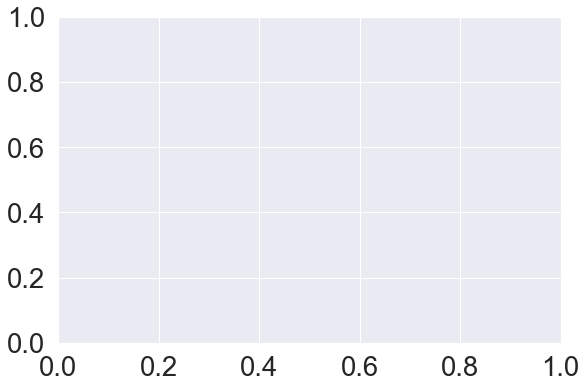

In [80]:
#안됨

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

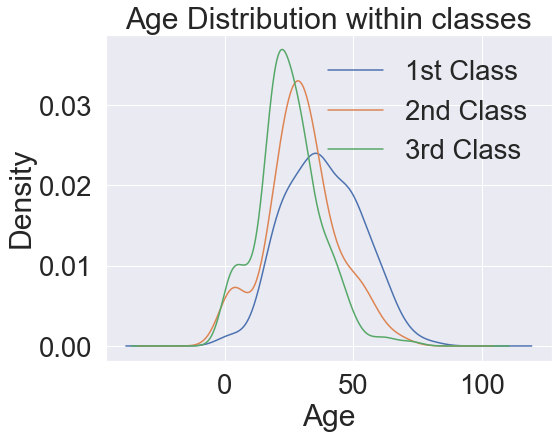

In [79]:
#age distribution withing classes
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])